In [1]:
import Agents
import Markets

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

def add_price_data(df, t):
    
    #pA_buy, pA_sell, pB_buy, pB_sell = df
    p_buy, p_sell = df
    
    for v, agent in enumerate(agent_list):
        p_buy[t][v] = agent.p_buy
        p_sell[t][v] = agent.p_sell



In [2]:
def add_quant_data(df, t):

    for v,agent in enumerate(agent_list):

        df[t][v] = agent.Q
    
    
    #print(agent_list[0].Q)
    
def add_deficit_data(df, t):

    for v,agent in enumerate(agent_list):

        df[t][v] = agent.D
    
def add_money_data(df, t):
    
    for v,agent in enumerate(agent_list):

        df[t][v] = agent.M
    
def reset():
    
    for agent in agentA_list:
        #agent.Q = QA
        #agent.D = DA
        
        p1buy_A_0 = 10# np.random.uniform(0, agent.M)
        p2buy_A_0 = 10# np.random.uniform(0, agent.M)
        p1sell_A_0 = 10# np.random.uniform(0, agent.M)
        p2sell_A_0 = 10# np.random.uniform(0, agent.M)
        agent.p_buy = [p1buy_A_0, p2buy_A_0]#np.random.uniform(M, size=n) #[15, 10]
        agent.p_sell = [p1sell_A_0, p2sell_A_0]#np.random.uniform(M, size=n) #[25, 30]
        
    for agent in agentB_list:
        #agent.Q = QB
        #agent.D = DB
        
        p1buy_B_0 = 10# np.random.uniform(0, agent.M)
        p2buy_B_0 = 10# np.random.uniform(0, agent.M)
        p1sell_B_0 = 10# np.random.uniform(0, agent.M)
        p2sell_B_0 = 10# np.random.uniform(0, agent.M)
        agent.p_buy = [p1buy_B_0, p2buy_B_0]#np.random.uniform(M, size=n) #[10, 15]
        agent.p_sell = [p1sell_B_0, p2sell_B_0]#np.random.uniform(M, size=n) #[30, 25]
    
    market.reset()


In [3]:
def plot_market(i, *, ps=10, log=False):

    f, ax = plt.subplots(1, figsize=(10,4)) #(2,1)

    ax.plot(ME_df[:,i], c='C0', label=f'$\Delta M_{i}$')
    ax.plot(QE_df[:,i], c='C1', label=f'$\Delta Q_{i}$')
    ax.plot(ntries_df, c='k', label='Tries', lw='0.5')

    p = ME_df[:,i]/QE_df[:,i]
    ax.scatter(np.arange(0,T), p, c='g', label='f$p_{i}$', s=ps)

    ax.legend()
    
    if log:
        plt.yscale('log')
        
    plt.title(f'Market for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('$M$, $Q$')


def plot_prices(p_df, i, *, A=0, B=1, ps=10, log=False, includeM=True):

    'A sells i=0 and buys i=1, and vice versa for B'

    if i == 0:
        plt.plot(p_df[1][:,A,i], c='C0', ls='-.', label=f"A's Selling Price for {i}")
        plt.plot(p_df[0][:,B,i], c='C1', ls='-', label=f"B's Buying Price for {i}")

    elif i == 1:
        plt.plot(p_df[0][:,A,i], c='C0', ls='-', label=f"A's Buying Price for {i}")
        plt.plot(p_df[1][:,B,i], c='C1', ls='-.', label=f"B's Selling Price for {i}")

    if includeM:
        plt.plot(M_df[:,A], c='C0', ls=':', lw=0.5, label=f'$M_A$')
        plt.plot(M_df[:,B], c='C1', ls=':', lw=0.5, label=f'$M_B$')
    
    p = ME_df[:,i]/QE_df[:,i]
    plt.scatter(np.arange(T)+0.5, p, c='g', s=ps)
    
    plt.legend()
    
    if log:
        plt.yscale('log')

    plt.title(f'Market Prices for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('Prices')
    
def plot_quantities(Q_df, D_df, i, *, A=0, B=1):

    plt.plot(Q_df[:,A,i], c='C0', ls='-', label=f"A's Q{i}")
    plt.plot(D_df[:,A,i], c='C0', ls=':', label=f"A's D{i}")

    plt.plot(Q_df[:,B,i], c='C1', ls='-', label=f"B's Q{i}")
    plt.plot(D_df[:,B,i], c='C1', ls=':', label=f"B's D{i}")

    plt.legend()

    plt.title(f'Quantities for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('Q,D')


In [4]:
#1000/N

In [5]:
NA = 50
NB = 50
N = NA+NB
M = 100

n = 2

QA1 = 100
QA2 = 0

QB1 = 0
QB2 = 1

QA_0 = np.array([QA1, QA2])
QB_0 = np.array([QB1, QB2])

QA = np.copy(QA_0)
QB = np.copy(QB_0)

qA = np.array([0, 0])
qB = np.array([0, 0])

cA = np.array([0, 0])
cB = np.array([1, 0])

DA = cA.copy()
DB = cB.copy()


#p1buy_A_0, p2buy_A_0 = 10,10
#p1sell_A_0, p2sell_A_0 = 10,10

#p1buy_B_0, p2buy_B_0 = 10,10
#p1sell_B_0, p2sell_B_0 = 10,10

In [6]:
agentA_list = [Agents.Agent(QA.copy(), DA.copy(), M, n_actions=1, input_dims=[1]) for agent in range(NA)]
agentB_list = [Agents.Agent(QB.copy(), DB.copy(), M, n_actions=1, input_dims=[1]) for agent in range(NB)]

In [7]:
#agentA_list[0].Q = np.array([100, 0]) #np.zeros(n)
#agentA_list[0].M = agentA_list[0].M*10.

In [8]:
agent_list = agentA_list + agentB_list



In [9]:
#agent_list[0].Q = np.array([100, 0])

In [10]:
Q = np.zeros(n)
for agent in agent_list:
    Q += agent.Q
    
Q

array([5000.,   50.])

In [11]:
verbose = False
alpha = 0.5
beta = 0.5
gamma = 1.00
epsilon_switch = 0.00
epsilon_rand = 0.0
max_agent_tries = 100 #10# 100
max_tries = N*max_agent_tries
price_adjust_method = 'step_random' #proportional_random' #'step_random'
min_price = 1e-5

In [12]:
market = Markets.Market(n, 
                        verbose=verbose, 
                        minimum_price=min_price, 
                        alpha=alpha, 
                        beta=beta, 
                        gamma=gamma, 
                        epsilon_switch=epsilon_switch, 
                        epsilon_rand=epsilon_rand,
                        max_agent_tries=max_agent_tries, 
                        max_tries=max_tries,
                        price_adjust_method=price_adjust_method)
print(f'Market has {max_tries} max tries')

ExchangeDict = {agent : 2 for agent in agent_list}

Market has 10000 max tries


In [13]:
T = 100 #200

reset()

# Setup data
#pA_buy, pA_sell, pB_buy, pB_sell = np.zeros((T, 2)), np.zeros((T, 2)), np.zeros((T, 2)), np.zeros((T, 2))
p_buy, p_sell = np.zeros((T, N, n)), np.zeros((T, N, n))
p_df = (p_buy, p_sell)

#QA_df, QB_df = np.zeros((T, 2)), np.zeros((T, 2))
Q_df = np.zeros((T, N, n))

#DA_df, DB_df = np.zeros((T, 2)), np.zeros((T, 2))
D_df = np.zeros((T, N, n))

M_df = np.zeros((T, N))

ME_df = np.zeros((T,2))
QE_df = np.zeros((T,2))
sE_df = np.zeros((T,2))
ntries_df = []


add_price_data(p_df, 0)
add_quant_data(Q_df, 0)
add_deficit_data(D_df, 0)
add_money_data(M_df, 0)

# Run market
for t in range(T-1):
    
    # Market action occurs at half-time interval
    ME, QE, stn_dev, ntries = market.run_exchange(ExchangeDict)
    
    # Reset quantities
    for agentA in agentA_list:
        #pass
        #agentA.Q = np.maximum(np.zeros(n), agentA.Q + qA - cA) #np.array([QA1, QA2])*np.exp(-0.005*t)
        agentA.Q = QA.copy()
        agentA.M = M
        #agentA.D = agentA.D + 1
    for agentB in agentB_list:
        #pass
        #agentB.Q = np.maximum(np.zeros(n), agentB.Q + qB - cB) #np.array([QB1, QB2])*np.exp(0.001*t)
        agentB.Q = QB.copy()
        agentB.M = M
        agentB.D[0] = agentB.D[0] + 1
        
        #agentB.M = agentB.M + 10
        
    #agent_list[0].D = DA.copy()#*t
    #agent_list[1].D = DB.copy()*t
    
    #print(QA, agent_list[0].Q)
    
    add_price_data(p_df, t+1)
    add_quant_data(Q_df, t+1)
    add_deficit_data(D_df, t+1)
    add_money_data(M_df, t+1)
    
    # Market action occurs at half-time interval
    ME_df[t] = ME
    QE_df[t] = QE
    sE_df[t] = stn_dev
    ntries_df.append(ntries)

In [14]:
#market.IntendedExchange
#market.IntendedExchange#[buyer]

In [15]:
agent_list[0], agent_list[1]

(<Agents.Agent at 0x1e3ea32dff0>, <Agents.Agent at 0x1e3ea32fc70>)

In [16]:
#dict(zip(range(N),agent_list))

In [17]:
plt.rcParams['figure.dpi'] = 100

C:\Users\Alex\AppData\Local\Temp\ipykernel_17740\3557236308.py:9: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


(0.0, 100.0)

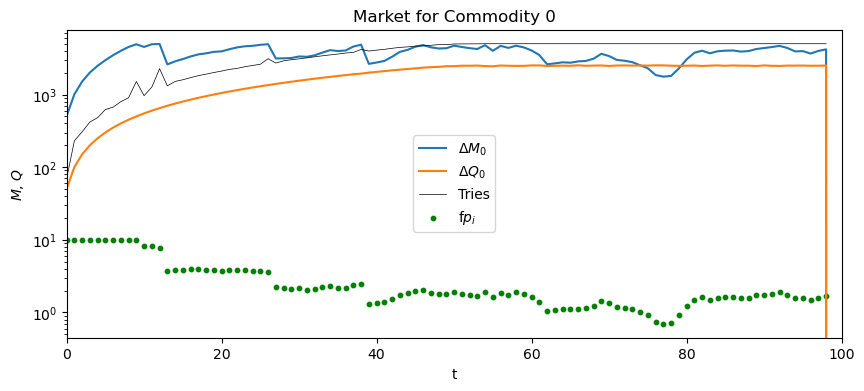

In [18]:
plot_market(0, log=True)
plt.xlim(0,T)
#plt.ylim(1e-1, 2e2)

#name = f'method={price_adjust_method} M={M} gam={gamma} eps={epsilon} max_agent_tries={max_agent_tries}'
#plt.savefig('market_plot1 ' + name + '.png')

C:\Users\Alex\AppData\Local\Temp\ipykernel_17740\3557236308.py:9: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


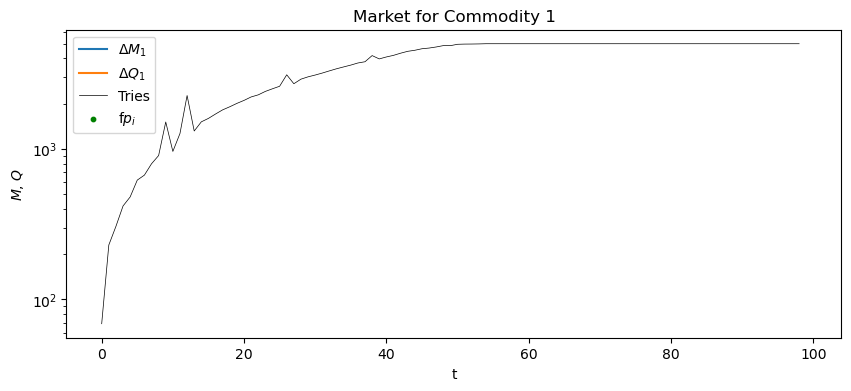

In [19]:
plot_market(1, log=True)

In [20]:
np.nanmean(ME_df/QE_df, axis=0)

C:\Users\Alex\AppData\Local\Temp\ipykernel_17740\3985086816.py:1: RuntimeWarning: invalid value encountered in divide
  np.nanmean(ME_df/QE_df, axis=0)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17740\3985086816.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean(ME_df/QE_df, axis=0)


array([2.96344788,        nan])

C:\Users\Alex\AppData\Local\Temp\ipykernel_17740\3557236308.py:38: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


(0.0, 100.0)

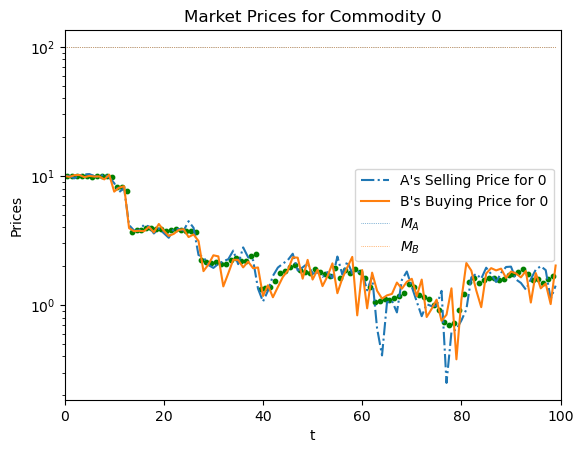

In [21]:
plot_prices(p_df, 0, log=True, includeM=True, A=0, B=NA)
plt.xlim(0,T)
#plt.ylim(1e-1, 2e2)

#name = f'method={price_adjust_method} M={M} gam={gamma} eps={epsilon} max_agent_tries={max_agent_tries}'
#plt.savefig('market_plot2 ' + name + '.png')

C:\Users\Alex\AppData\Local\Temp\ipykernel_17740\3557236308.py:38: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


(0.0, 100.0)

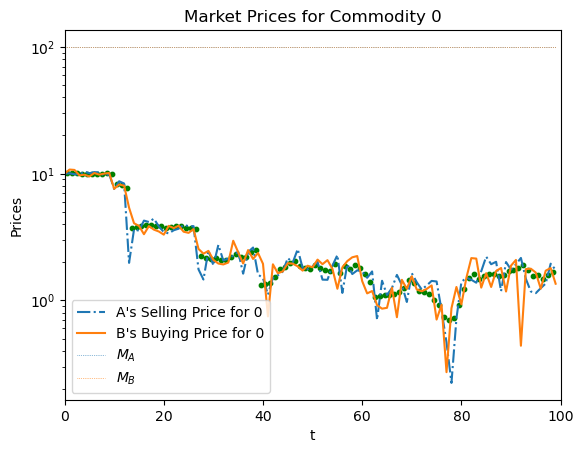

In [22]:
plot_prices(p_df, 0, log=True, includeM=True, A=0+1, B=NA+1)
plt.xlim(0,T)

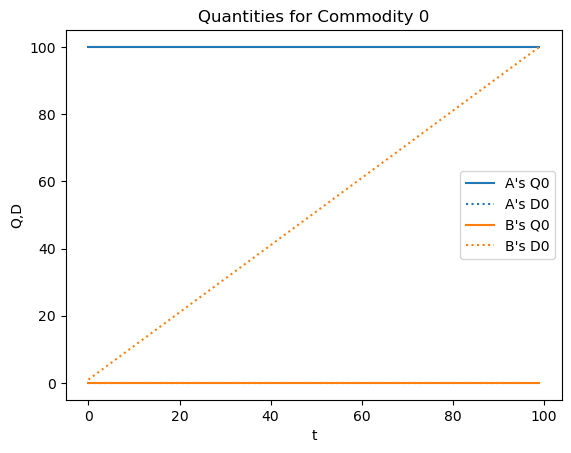

In [23]:
plot_quantities(Q_df, D_df, 0, A=0, B=NA)

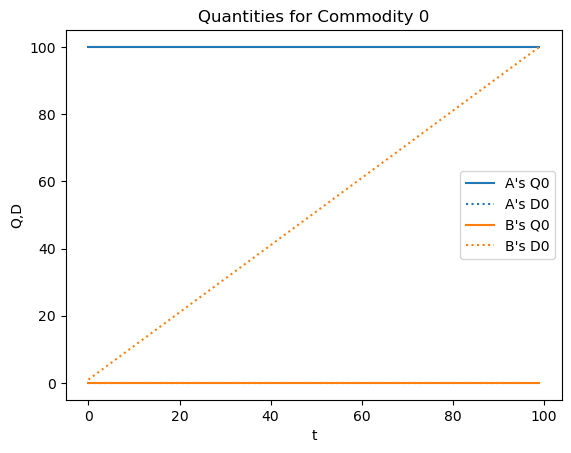

In [24]:
plot_quantities(Q_df, D_df, 0, A=1, B=NA+1)

In [25]:
agent_list[-1].D

array([100,   0])

In [26]:
#for n in range(NA):
#    plot_quantities(Q_df, D_df, 0, A=n, B=NA+n)

C:\Users\Alex\AppData\Local\Temp\ipykernel_17740\3557236308.py:38: RuntimeWarning: invalid value encountered in divide
  p = ME_df[:,i]/QE_df[:,i]


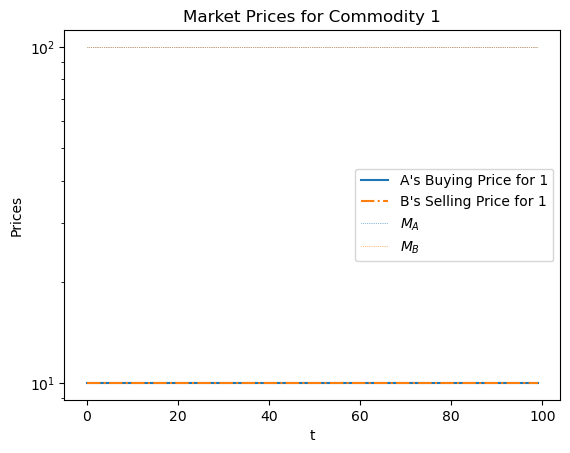

In [27]:
plot_prices(p_df, 1, log=True, includeM=True, A=0, B=NA)
#plt.grid()

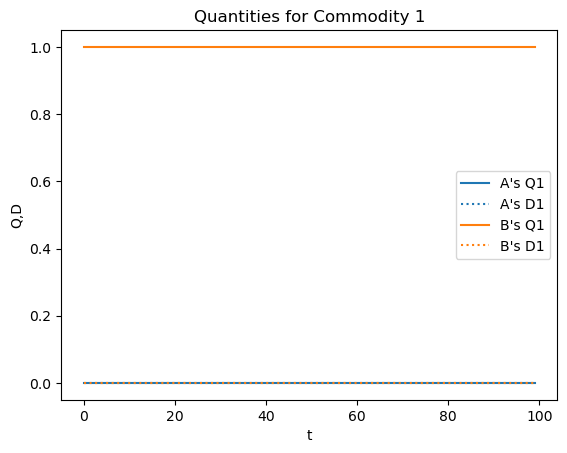

In [28]:
plot_quantities(Q_df, D_df, 1, A=0, B=NA)

This scheme won't work when the price is zero. 

Because $p' = p_0 (1+\alpha)$ will equal zero when $p_0$ is zero

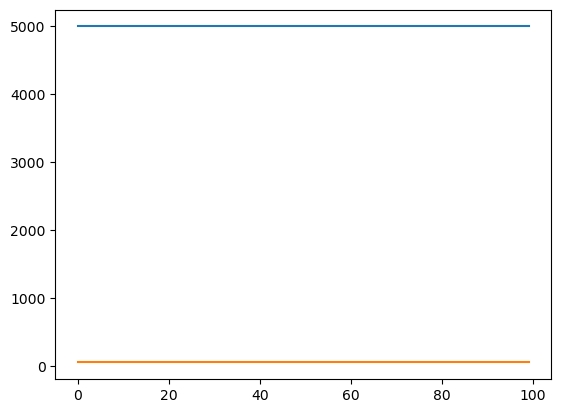

In [29]:
for i in range(n):
    y = Q_df.sum(axis=1)[:,i]
    
    plt.plot(y)

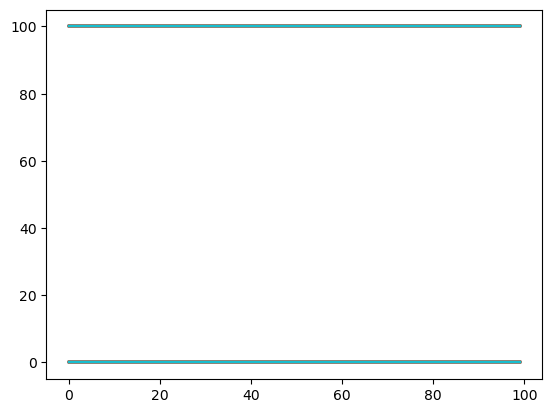

In [30]:
for v in range(len(agent_list)):
    y0 = Q_df[:,v,0]
    plt.plot(y0)

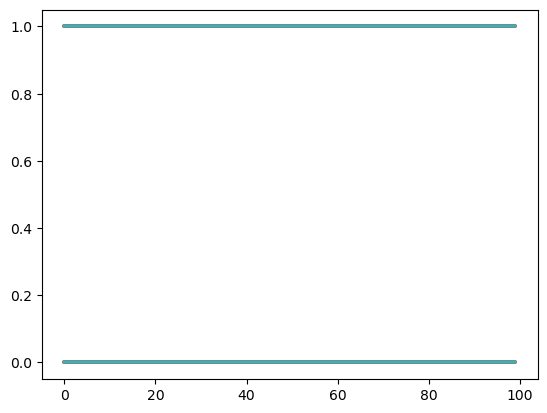

In [31]:
for v in range(len(agent_list)):
    y0 = Q_df[:,v,1]
    plt.plot(y0)

In [32]:
Q_df[:,1,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
agent_list[0].Q, agent_list[1].Q

(array([100,   0]), array([100,   0]))

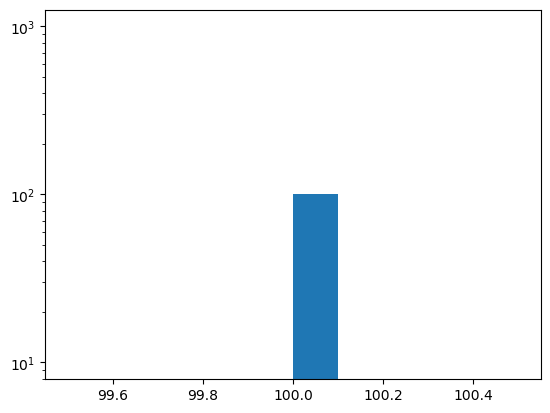

In [34]:
plt.hist([agent.M for agent in agent_list])
plt.yscale('log')

In [35]:
Q = np.zeros(n)
for agent in agent_list:
    Q += agent.Q
    
Q

array([5000.,   50.])

In [36]:
Q = np.zeros(n)
for agent in agentA_list:
    Q += agent.Q
    
Q

array([5000.,    0.])